In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("iris.csv").sample(100)

In [3]:
df.head()

,sepal length,sepal width,petal length,petal width,label
373,5.5,3.5,1.3,0.2,Iris-setosa
519,4.8,3.1,1.6,0.2,Iris-setosa
1394,6.0,2.2,3.9,1.0,Iris-versicolor
1573,5.7,3.0,3.9,1.3,Iris-versicolor
1631,5.5,2.4,3.8,1.1,Iris-versicolor


In [4]:
df.rename(columns={'label': 'species'}, inplace=True)

In [5]:
df.head()

,sepal length,sepal width,petal length,petal width,species
373,5.5,3.5,1.3,0.2,Iris-setosa
519,4.8,3.1,1.6,0.2,Iris-setosa
1394,6.0,2.2,3.9,1.0,Iris-versicolor
1573,5.7,3.0,3.9,1.3,Iris-versicolor
1631,5.5,2.4,3.8,1.1,Iris-versicolor


In [6]:
df.shape

(100, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 373 to 1860
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  100 non-null    float64
 1   sepal width   100 non-null    float64
 2   petal length  100 non-null    float64
 3   petal width   100 non-null    float64
 4   species       100 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.7+ KB


In [8]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,100.000000,100.000000,100.000000,100.000000
mean,5.879000,3.096000,3.674000,1.163000
std,0.826737,0.410449,1.856173,0.808997
min,4.400000,2.200000,1.100000,0.100000
25%,5.175000,2.875000,1.500000,0.200000
50%,5.800000,3.100000,4.200000,1.300000
75%,6.500000,3.300000,5.300000,1.900000
max,7.900000,4.400000,6.600000,2.500000


In [9]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
df['species'].value_counts()

species
Iris-virginica     39
Iris-setosa        38
Iris-versicolor    23
Name: count, dtype: int64

In [12]:
# Sort the sample for a meaningful line plot
df_sample_sorted = df.sort_values(by="sepal length")
df_sample_sorted.head()

,sepal length,sepal width,petal length,petal width,species
507,4.4,3.2,1.3,0.2,Iris-setosa
359,4.4,3.1,1.3,0.1,Iris-setosa
634,4.5,3.1,1.5,0.2,Iris-setosa
282,4.6,3.1,1.5,0.2,Iris-setosa
249,4.6,2.5,1.3,0.3,Iris-setosa


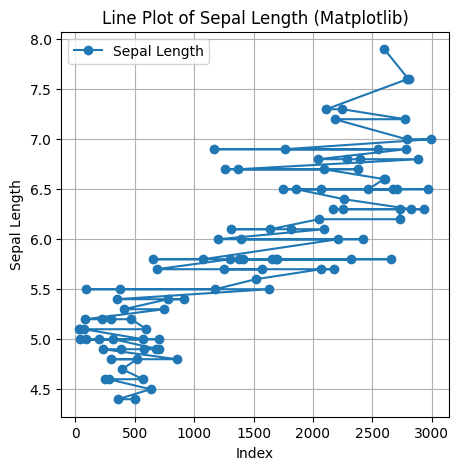

In [13]:
# Matplotlib Line Plot
plt.figure(figsize=(5, 5))
plt.plot(df_sample_sorted.index, df_sample_sorted["sepal length"], marker="o", linestyle="-", label="Sepal Length")
plt.xlabel("Index")
plt.ylabel("Sepal Length")
plt.title("Line Plot of Sepal Length (Matplotlib)")
plt.legend()
plt.grid(True)

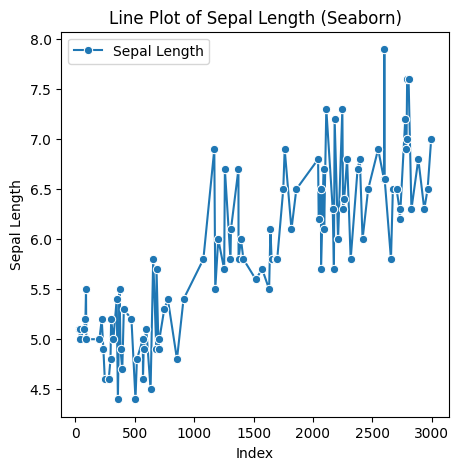

In [14]:
# Seaborn Line Plot
plt.figure(figsize=(5, 5))
sns.lineplot(data=df_sample_sorted, x=df_sample_sorted.index, y="sepal length", marker="o", label="Sepal Length")
plt.xlabel("Index")
plt.ylabel("Sepal Length")
plt.title("Line Plot of Sepal Length (Seaborn)")
plt.legend()

###  
We can observe fluctuations in sepal length, indicating diversity in flower size among different iris species. 

In [20]:
# Group by species and calculate mean sepal length
species_avg = df.groupby("species")["sepal length"].mean()
species_avg

species
Iris-setosa        5.031579
Iris-versicolor    6.047826
Iris-virginica     6.605128
Name: sepal length, dtype: float64

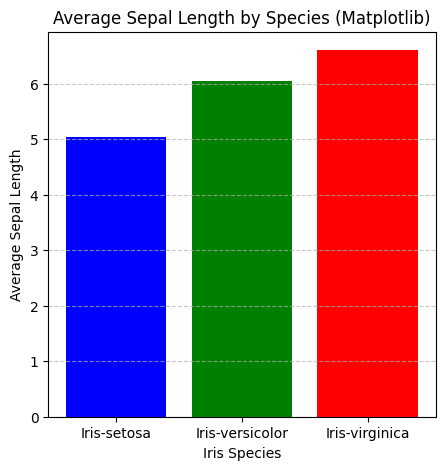

In [18]:
# Matplotlib Bar Plot
plt.figure(figsize=(5, 5))
plt.bar(species_avg.index, species_avg.values, color=["blue", "green", "red"])
plt.xlabel("Iris Species")
plt.ylabel("Average Sepal Length")
plt.title("Average Sepal Length by Species (Matplotlib)")
plt.grid(axis="y", linestyle="--", alpha=0.7)

In [25]:
# for ignore warnings
import warnings
warnings.filterwarnings("ignore")

Text(0.5, 1.0, 'Average Sepal Length by Species (Seaborn)')

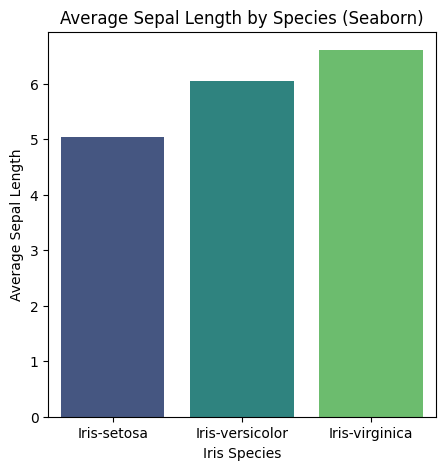

In [26]:
# Seaborn Bar Plot
plt.figure(figsize=(5, 5))
sns.barplot(x=species_avg.index, y=species_avg.values, palette="viridis")
plt.xlabel("Iris Species")
plt.ylabel("Average Sepal Length")
plt.title("Average Sepal Length by Species (Seaborn)")

### 
Each bar represents the mean sepal length for a particular species, allowing us to observe how the sepal length varies among them.

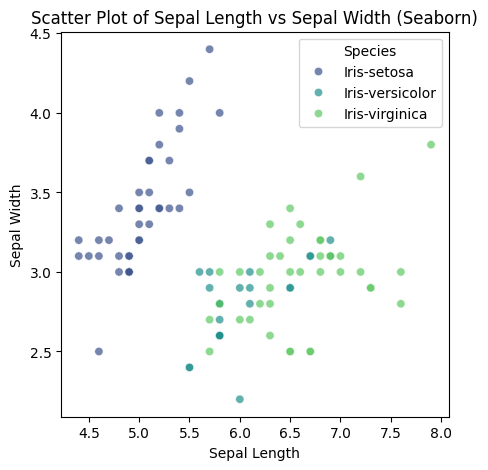

In [27]:
# Seaborn Scatter Plot
plt.figure(figsize=(5, 5))
sns.scatterplot(data=df, x="sepal length", y="sepal width", hue="species", palette="viridis", alpha=0.7)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Scatter Plot of Sepal Length vs Sepal Width (Seaborn)")
plt.legend(title="Species")

### 
Iris Setosa appears to have shorter and wider sepals, forming a distinct cluster.
Iris Virginica and Iris Versicolor tend to have longer sepals, but their width varies more.

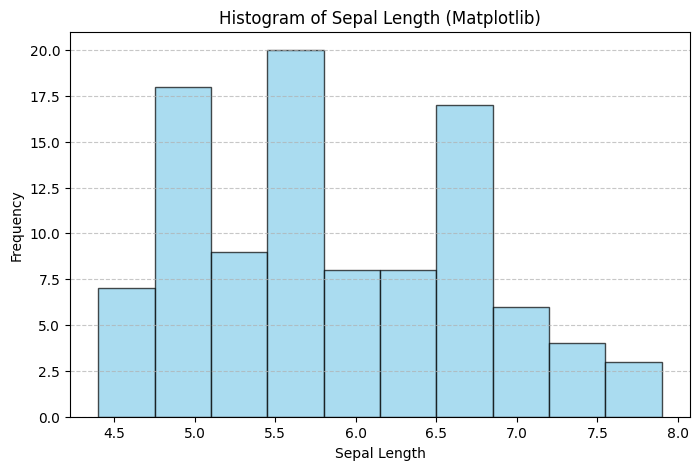

In [29]:
# Matplotlib Histogram
plt.figure(figsize=(8, 5))
plt.hist(df["sepal length"], bins=10, color="skyblue", edgecolor="black", alpha=0.7)
plt.xlabel("Sepal Length")
plt.ylabel("Frequency")
plt.title("Histogram of Sepal Length (Matplotlib)")
plt.grid(axis="y", linestyle="--", alpha=0.7)

Text(0.5, 1.0, 'Histogram of Sepal Length (Seaborn)')

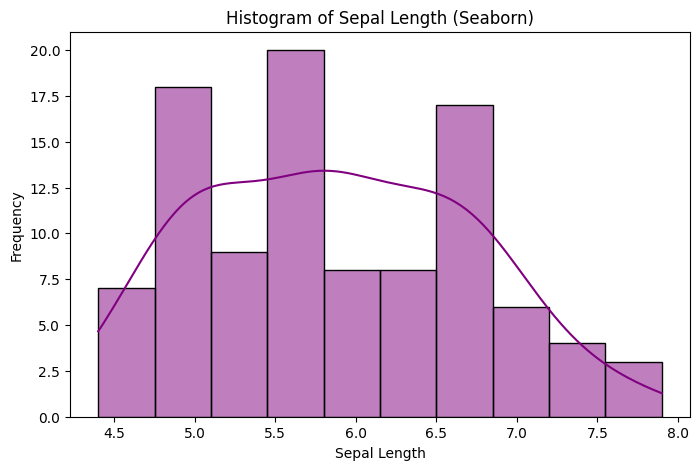

In [30]:
# Seaborn Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df["sepal length"], bins=10, kde=True, color="purple")
plt.xlabel("Sepal Length")
plt.ylabel("Frequency")
plt.title("Histogram of Sepal Length (Seaborn)")

### 
The histogram of sepal length reveals a roughly normal (bell-shaped) distribution, indicating that most flowers have sepal lengths concentrated around a central range. The highest frequency is observed for medium sepal lengths (approximately 5.5 - 6.5 cm), suggesting that these values are  the most common among the sampled iris flowers. In contrast, very short or very long sepals are less frequent, highlighting that extreme values are 
rare in the dataset. Additionally, the Seaborn KDE curve reinforces this observation by showing a smooth density estimation, confirming that the 
majority of flowers have sepal lengths centered around 5.5 - 6.5 cm.

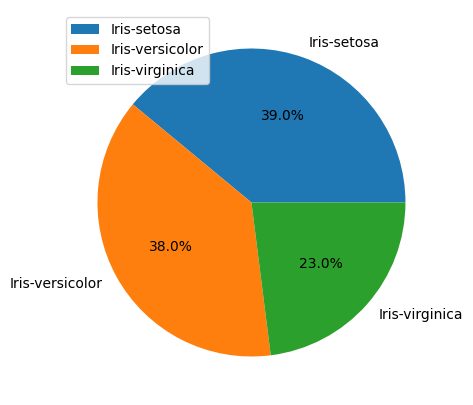

In [33]:
plt.figure(figsize=(5,5))
plt.pie(df['species'].value_counts(),labels = df['species'].unique(), autopct = "%1.1f%%")
plt.legend()

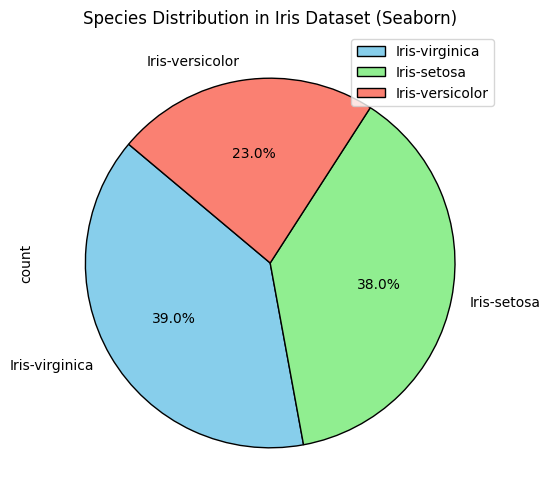

In [35]:
# Seaborn Pie Chart
plt.figure(figsize=(6, 6))
df["species"].value_counts().plot.pie(autopct="%1.1f%%", colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title("Species Distribution in Iris Dataset (Seaborn)")
plt.legend()

###
The pie charts illustrate the proportion of each iris species in the sampled dataset, helping to understand their relative frequency. The distribution 
appears fairly balanced, though some species might have slightly higher representation than others due to random sampling.

Text(0, 0.5, 'Sepal Length (cm)')

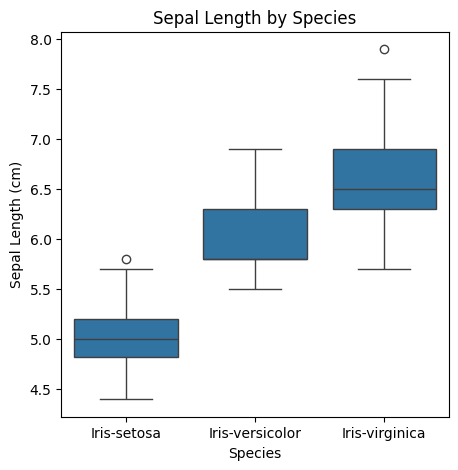

In [40]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='species', y='sepal length', data=df)
plt.title('Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')

###
The sepal length varies across the three species of Iris. Iris-setosa has the smallest sepal length, and its distribution is relatively narrow. In 
contrast, Iris-versicolor has a moderate sepal length, with a wider distribution compared to Iris-setosa. The largest sepal length is observed in 
Iris-virginica, which also has the widest distribution among the three species.

Text(0, 0.5, 'Sepal Length (cm)')

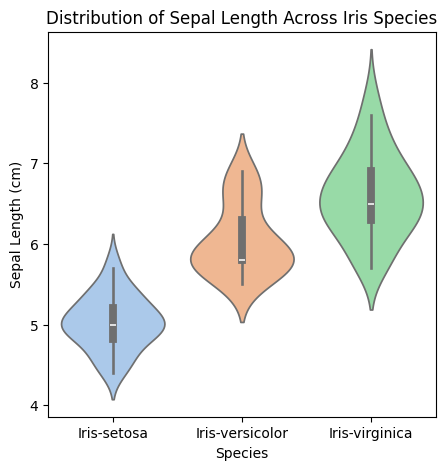

In [42]:
# Create a violin plot for sepal length
plt.figure(figsize=(5, 5))
sns.violinplot(x='species', y='sepal length', data=df, palette='pastel')

plt.title('Distribution of Sepal Length Across Iris Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')

### 
Iris-setosa has the smallest sepal length with a narrow distribution, indicating less variation. Iris-versicolor exhibits a wider distribution, suggesting more variation in sepal length. Iris-virginica has the largest sepal length and the broadest distribution, reflecting significant variability within this species. 

Text(0, 0.5, 'Density')

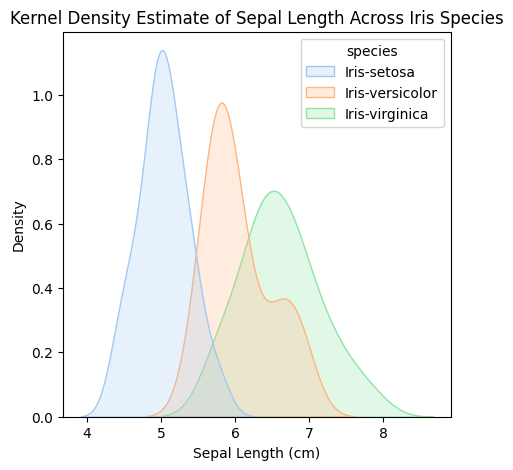

In [43]:
# Create KDE plot for sepal length
plt.figure(figsize=(5, 5))
sns.kdeplot(data=df, x='sepal length', hue='species', fill=True, common_norm=False, palette='pastel')

plt.title('Kernel Density Estimate of Sepal Length Across Iris Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Density')

###
Iris-setosa has a distinct peak at a lower sepal length range, with minimal overlap with the other species, indicating its uniqueness in this feature. 
Iris-versicolor exhibits a moderate sepal length distribution, overlapping with both Iris-setosa and Iris-virginica, showing its transitional nature. 
Iris-virginica has the largest sepal length range, with a wider spread, indicating greater variability within this species. 

Text(22.806999999999995, 0.5, 'Density')

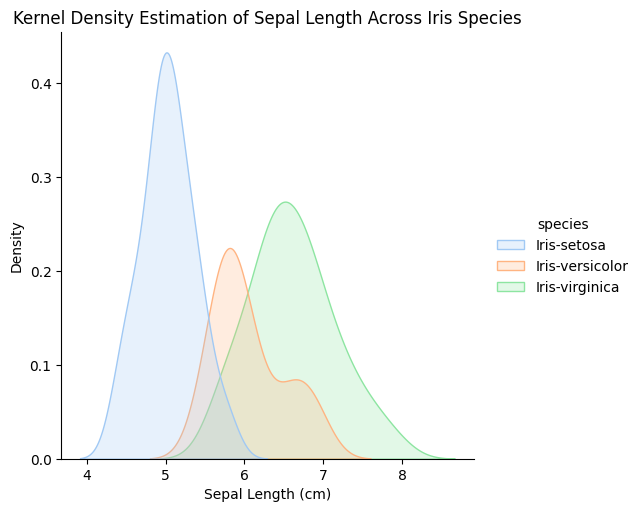

In [45]:
# Create KDE plot using displot
sns.displot(data=df, x="sepal length", kind="kde", hue="species", fill=True, palette="pastel")

plt.title("Kernel Density Estimation of Sepal Length Across Iris Species")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Density")

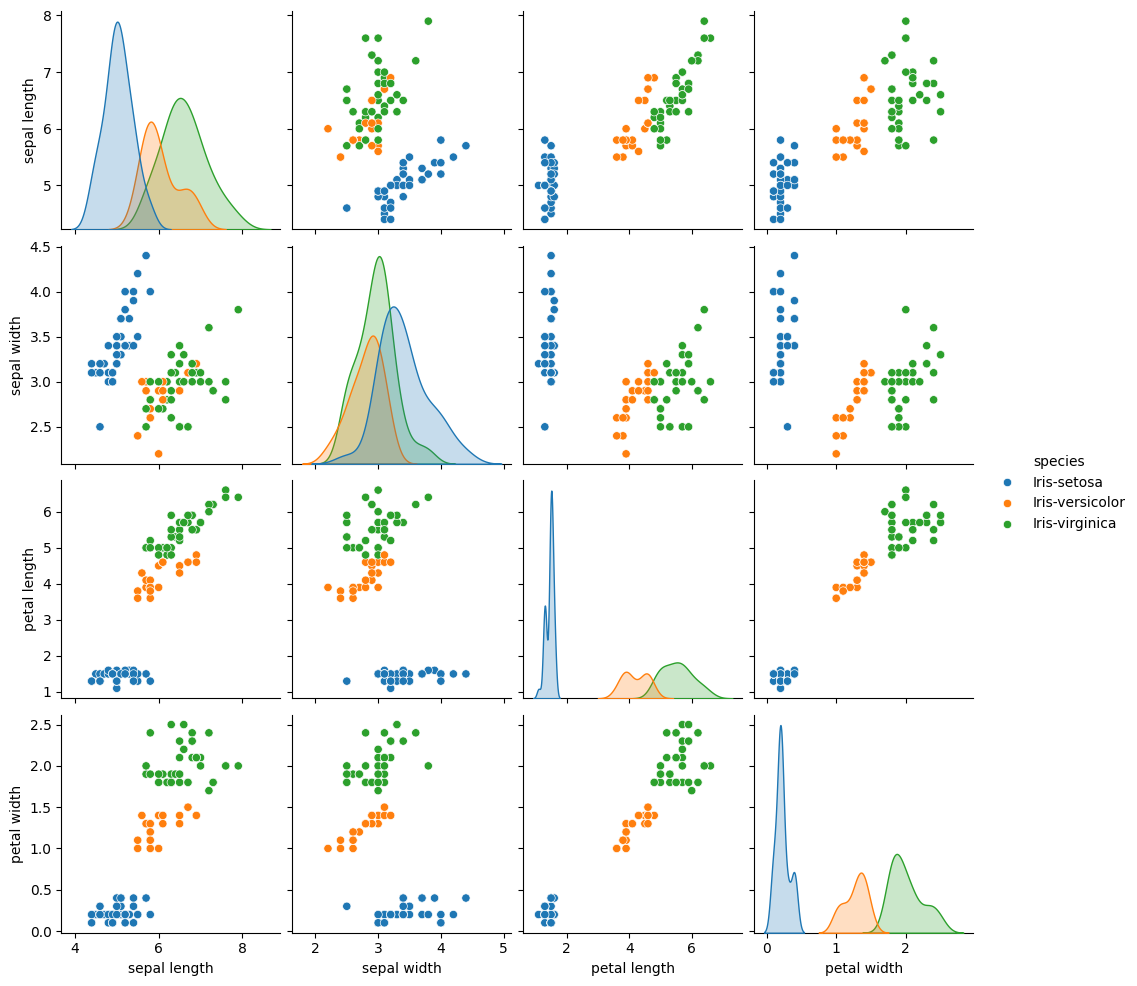

In [47]:
sns.pairplot(df, hue="species")